In [1]:
from coffea.nanoevents import NanoEventsFactory, PFNanoAODSchema
import fastjet
import awkward as ak
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# a PFNano file containing 2018 ggF simulation
sample = "/uscms/home/jennetd/nobackup/hbb-prod-modes/run3-triggers/data-mc/ggF.root"

In [3]:
events = NanoEventsFactory.from_root(
    {sample:"/Events"},
    schemaclass=PFNanoAODSchema,
).events()

In [4]:
import fastjet

In [5]:
# For soft drop studies we care about the AK8 jets
fatjets = events.FatJet

candidatejet = fatjets[(fatjets.pt > 450)
                       & (abs(fatjets.eta) < 2.5)
                       #& fatjets.isTight
                       ]

# Let's use only one jet
leadingjets = candidatejet[:,0:1]

In [8]:
pf = ak.flatten(leadingjets.constituents.pf, axis=1)

In [9]:
jetdef = fastjet.JetDefinition(fastjet.cambridge_algorithm, 0.8)

In [10]:
cluster = fastjet.ClusterSequence(pf, jetdef)
softdrop_zcut10_beta0 = cluster.exclusive_jets_softdrop_grooming()

In [11]:
softdrop_zcut10_beta0_cluster = fastjet.ClusterSequence(softdrop_zcut10_beta0.constituents, jetdef)
n2 = softdrop_zcut10_beta0_cluster.exclusive_jets_energy_correlator(func="nseries", npoint = 2)

#--------------------------------------------------------------------------
#                         FastJet release 3.4.1
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


(array([ 17.,   3.,   2.,  24.,  49., 112., 121., 117., 133.,  43.]),
 array([0.        , 0.04290121, 0.08580241, 0.12870362, 0.17160482,
        0.21450603, 0.25740724, 0.30030844, 0.34320965, 0.38611085,
        0.42901206]),
 <BarContainer object of 10 artists>)

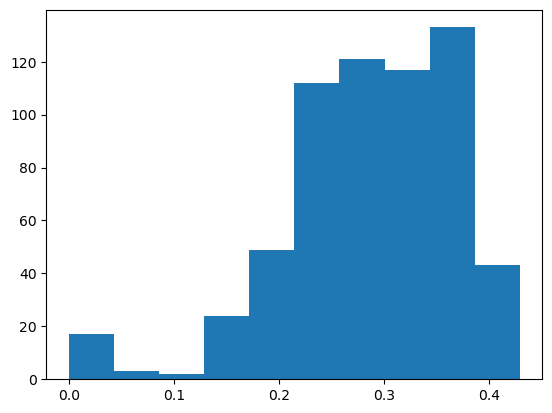

In [14]:
plt.hist(n2.compute())

(array([263.,  46.,  50., 132.,  96.,  20.,  12.,   4.,   2.,   1.]),
 array([-1.04218537e-01,  3.06679420e+01,  6.14401025e+01,  9.22122630e+01,
         1.22984424e+02,  1.53756584e+02,  1.84528745e+02,  2.15300905e+02,
         2.46073066e+02,  2.76845226e+02,  3.07617387e+02]),
 <BarContainer object of 10 artists>)

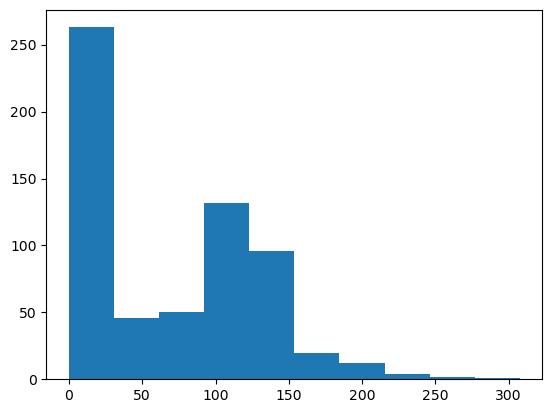

In [22]:
plt.hist(softdrop_zcut10_beta0.compute().msoftdrop)